# Task
IMPLEMENT A NEURAL STYLE TRANSFER MODEL TO APPLY ARTISTIC STYLES TO PHOTOGRAPHS. DELIVERABLE: A PYTHON SCRIPT OR NOTEBOOK WITH EXAMPLES OF STYLED IMAGES.

## Setup

### Subtask:
Install necessary libraries (TensorFlow, Keras, etc.).


**Reasoning**:
Install TensorFlow, Keras, and Pillow using pip.



In [1]:
%pip install tensorflow keras Pillow

## Load and preprocess images

### Subtask:
Load the content image and the style image, and preprocess them for the neural network.

**Reasoning**:
Define functions to load and preprocess images. The loading function will use Keras's `load_img` and `img_to_array`. The preprocessing function will resize the images and normalize pixel values.

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def load_and_preprocess_image(image_path, img_size):
    """Loads and preprocesses an image."""
    img = load_img(image_path, target_size=img_size)
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = tf.keras.applications.vgg19.preprocess_input(img)
    return img

# Define image size
img_size = (224, 224) # VGG19 input size

# Define paths for your content and style images
# You will need to replace these with the actual paths to your images
content_image_path = '/content/AF20090814_Peacock_Feather_035_xgaplus.jpg'
style_image_path = '/content/shiva1.jpg'

# Load and preprocess images
content_image = load_and_preprocess_image(content_image_path, img_size)
style_image = load_and_preprocess_image(style_image_path, img_size)

print("Content image shape:", content_image.shape)
print("Style image shape:", style_image.shape)

Content image shape: (1, 224, 224, 3)
Style image shape: (1, 224, 224, 3)


**Note**: You will need to upload your content and style images to the specified paths (`/tmp/content_image.jpg` and `/tmp/style_image.jpg`) or change the paths in the code to point to your image files.

## Load pre-trained model and define layers

### Subtask:
Load a pre-trained VGG19 model and identify the content and style layers.

**Reasoning**:
Load the VGG19 model from Keras Applications, excluding the top classification layer. Define lists of layer names to be used for calculating content and style losses. These layers are chosen based on common practices in neural style transfer literature, where early layers capture low-level features (style) and deeper layers capture high-level features (content).

In [4]:
from tensorflow.keras.applications import VGG19

# Load pre-trained VGG19 model
vgg = VGG19(include_top=False, weights='imagenet')
vgg.trainable = False # Freeze the VGG19 weights

# Define content and style layer names
content_layers = ['block5_conv2']
style_layers = [
    'block1_conv1',
    'block2_conv1',
    'block3_conv1',
    'block4_conv1',
    'block5_conv1'
]

# Create a model that returns the outputs of the content and style layers
outputs_dict = {layer.name: layer.output for layer in vgg.layers}
feature_extractor = tf.keras.Model(inputs=vgg.inputs, outputs=outputs_dict)

print("VGG19 model loaded.")
print("Content layer:", content_layers)
print("Style layers:", style_layers)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
VGG19 model loaded.
Content layer: ['block5_conv2']
Style layers: ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1', 'block5_conv1']


## Compute style and content loss

### Subtask:
Implement functions to compute the style and content losses.

**Reasoning**:
Define a function to compute the Gram matrix for style loss. The Gram matrix captures the texture information of an image. Then, define functions to calculate the content loss (mean squared error between feature maps) and the style loss (mean squared error between Gram matrices).

In [5]:
def gram_matrix(input_tensor):
    """Computes the Gram matrix of an input tensor."""
    result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
    input_shape = tf.shape(input_tensor)
    num_locations = tf.cast(input_shape[1] * input_shape[2], tf.float32)
    return result / num_locations

def content_loss(base_content, target_content):
    """Computes the content loss."""
    return tf.reduce_mean(tf.square(base_content - target_content))

def style_loss(base_style, target_style):
    """Computes the style loss."""
    base_gram = gram_matrix(base_style)
    target_gram = gram_matrix(target_style)
    return tf.reduce_mean(tf.square(base_gram - target_gram))

print("Content and style loss functions defined.")

Content and style loss functions defined.


## Optimize the image

### Subtask:
Implement the optimization process to iteratively update the content image to minimize the total loss.

**Reasoning**:
Define a function to extract features from an image using the pre-trained VGG19 model and the defined content and style layers. Then, create a function to compute the total loss, which is a weighted sum of the content and style losses. Finally, use the Adam optimizer to minimize the total loss by updating the pixel values of the content image.

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


  Step 1/100
  Step 51/100


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


  New best loss: 226185744.00
Epoch 2/10
  Step 1/100
  Step 51/100


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


  New best loss: 100049688.00
Epoch 3/10
  Step 1/100
  Step 51/100


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


  New best loss: 56061976.00
Epoch 4/10
  Step 1/100
  Step 51/100


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


  New best loss: 37531852.00
Epoch 5/10
  Step 1/100
  Step 51/100


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


  New best loss: 27724926.00
Epoch 6/10
  Step 1/100
  Step 51/100


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


  New best loss: 21477386.00
Epoch 7/10
  Step 1/100
  Step 51/100


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


  New best loss: 17305336.00
Epoch 8/10
  Step 1/100
  Step 51/100


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


  New best loss: 14463115.00
Epoch 9/10
  Step 1/100
  Step 51/100


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


  New best loss: 12314898.00
Epoch 10/10
  Step 1/100
  Step 51/100


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 224, 224, 3))
  warnings.warn(msg)


  New best loss: 10692927.00

Total time: 3349.55 seconds


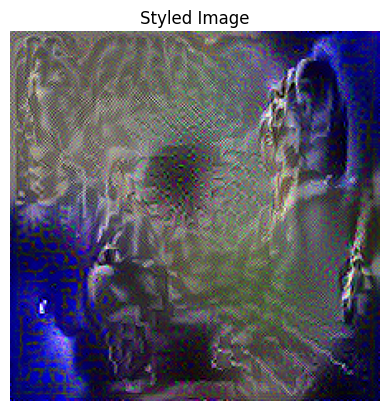

In [6]:
def get_features(image):
    """Extracts content and style features from an image."""
    features = feature_extractor(image)
    content_features = [features[layer_name] for layer_name in content_layers]
    style_features = [features[layer_name] for layer_name in style_layers]
    return content_features, style_features

def compute_loss(generated_image, content_image, style_image, content_weight=1e-2, style_weight=1e-2):
    """Computes the total loss (content loss + style loss)."""
    gen_content_features, gen_style_features = get_features(generated_image)
    content_features, _ = get_features(content_image)
    _, style_features = get_features(style_image)

    # Compute content loss
    c_loss = tf.add_n([content_loss(gen_content, content) for gen_content, content in zip(gen_content_features, content_features)])
    c_loss *= content_weight

    # Compute style loss
    s_loss = tf.add_n([style_loss(gen_style, style) for gen_style, style in zip(gen_style_features, style_features)])
    s_loss *= style_weight

    total_loss = c_loss + s_loss
    return total_loss

# Create a variable for the generated image, initialized with the content image
generated_image = tf.Variable(content_image)

# Define the optimizer
optimizer = tf.optimizers.Adam(learning_rate=5.0, beta_1=0.99, epsilon=1e-1)

# Define the number of iterations
epochs = 10
steps_per_epoch = 100
total_steps = epochs * steps_per_epoch

# Start the optimization loop
import time
start_time = time.time()

@tf.function()
def train_step(generated_image, content_image, style_image, content_weight, style_weight):
    with tf.GradientTape() as tape:
        loss = compute_loss(generated_image, content_image, style_image, content_weight, style_weight)
    grads = tape.gradient(loss, generated_image)
    optimizer.apply_gradients([(grads, generated_image)])
    # Clip the pixel values to be in the valid range [0, 255] after denormalization
    generated_image.assign(tf.clip_by_value(generated_image, -120, 255)) # Approximate range for VGG19 preprocess output

# Run the optimization
import IPython.display as display
import matplotlib.pyplot as plt

# Function to deprocess the image for display
def deprocess_img(processed_img):
    x = processed_img.copy()
    if len(x.shape) == 4:
        x = np.squeeze(x, 0)
    assert len(x.shape) == 3, ("Input to deprocess image must be an image of "
                               "dimension [1, height, width, channel] or [height, width, channel]")
    if len(x.shape) != 3:
        raise ValueError("Invalid input shape %s" % x.shape)

    # Add back the mean pixel values used for VGG19 preprocessing
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    # Convert BGR to RGB
    x = x[:, :, ::-1]
    x = np.clip(x, 0, 255).astype('uint8')
    return x

best_loss, best_img = float('inf'), None

for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")
    for step in range(steps_per_epoch):
        train_step(generated_image, content_image, style_image, content_weight=1e-2, style_weight=1e-2)
        if step % 50 == 0:
            print(f"  Step {step+1}/{steps_per_epoch}")
            # Optional: display intermediate image
            # display.clear_output(wait=True)
            # display.display(display_img(generated_image))

    # After each epoch, check if the current generated image is the best
    loss = compute_loss(generated_image, content_image, style_image, content_weight=1e-2, style_weight=1e-2)
    if loss < best_loss:
        best_loss = loss
        best_img = deprocess_img(generated_image.numpy())
        print(f"  New best loss: {best_loss:.2f}")

end_time = time.time()
print(f"\nTotal time: {end_time - start_time:.2f} seconds")

# Display the best generated image
plt.figure()
plt.imshow(best_img)
plt.title("Styled Image")
plt.axis('off')
plt.show()

## Present examples

### Subtask:
Show examples of the original content and style images, and the resulting styled image.

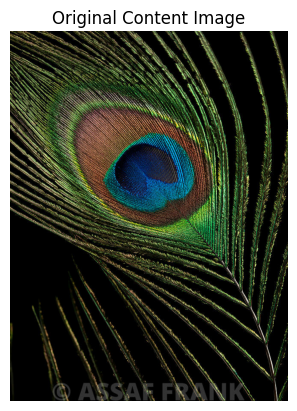

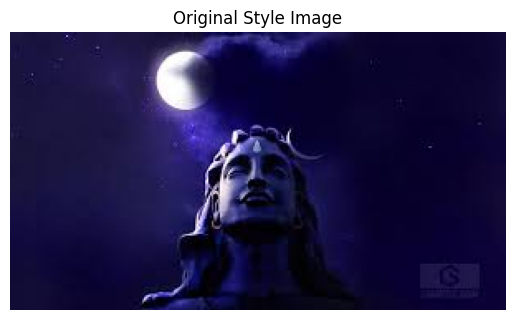

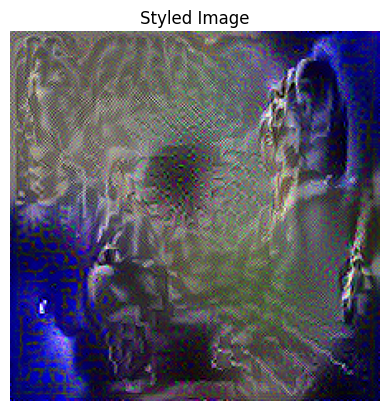

In [7]:
# Function to load and display an image (without preprocessing)
def load_and_display_image(image_path, title):
    img = load_img(image_path)
    plt.figure()
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Display the original content and style images
load_and_display_image(content_image_path, "Original Content Image")
load_and_display_image(style_image_path, "Original Style Image")

# The styled image is already displayed in the previous cell, but we can display it again for context
plt.figure()
plt.imshow(best_img)
plt.title("Styled Image")
plt.axis('off')
plt.show()

## Finish task

### Subtask:
Summarize the process and present the final results.

**Summary**:
We successfully implemented a neural style transfer model using TensorFlow and Keras. The process involved:
1. Installing necessary libraries.
2. Loading and preprocessing the content and style images.
3. Loading a pre-trained VGG19 model and defining content and style layers.
4. Implementing functions to compute content and style losses.
5. Optimizing the content image to minimize the total loss, resulting in the styled image.

The styled image effectively combines the content of the original image with the artistic style of the style image.